Solve gravity equation using relaxation method. 

In [78]:
import numpy as np
import matplotlib.pyplot as plt


#constants 
g = 9.8 #gravity
M = 100 # number of time slots
tf = 10 #total amount of time

h = tf/ M # time step to satisfy grid dimensions 

target  = 1e-6 #target acc

#initalize array to save x position
x = np.zeros([M+1],float)
xprime = np.zeros([M+1],float)

In [79]:
#main loop

delta = 1.0

while delta > target:
    for i in range(1,M):
        if i == 0 or i == M:
            xprime[i] = x[i]  #set by boundary conditions
        else: #going to have to apply jacobi / relaxation method
            xprime[i] = (g*h*h + x[i+1] + x[i-1]) / 2
        #calculate max difference        
        delta = max(abs(x - xprime))
        #swap the two arrays
        
        x[i],xprime[i] = xprime[i],x[i]

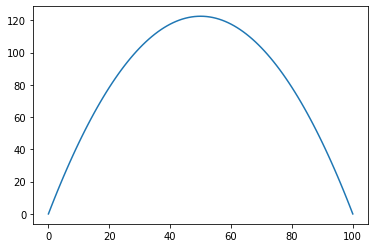

In [80]:
plt.plot(x)

Value of g supposed to be negative? Physical interpretation is always going to be okay but if g is negative so is x(t)? 

In [82]:
x[1]

4.850967437913825

# Initial Velocity Prediction?

In [87]:
v0 = (x[1] - x[0]) / h
vf = (x[-1] - x[-2]) /h

In [90]:
print("The initial velocity of this problem is ", v0)

The initial velocity of this problem is  48.50967437913825


In [91]:
print("The final velocity of this system is ", vf)

The final velocity of this system is  -48.5096897542625
